Выполнила: Анастасия Плавина

# Тема 1. Основы обучения нейронных сетей

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

## Пример построения  двухслойной нейронной сети на numpy

In [6]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import random
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [7]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


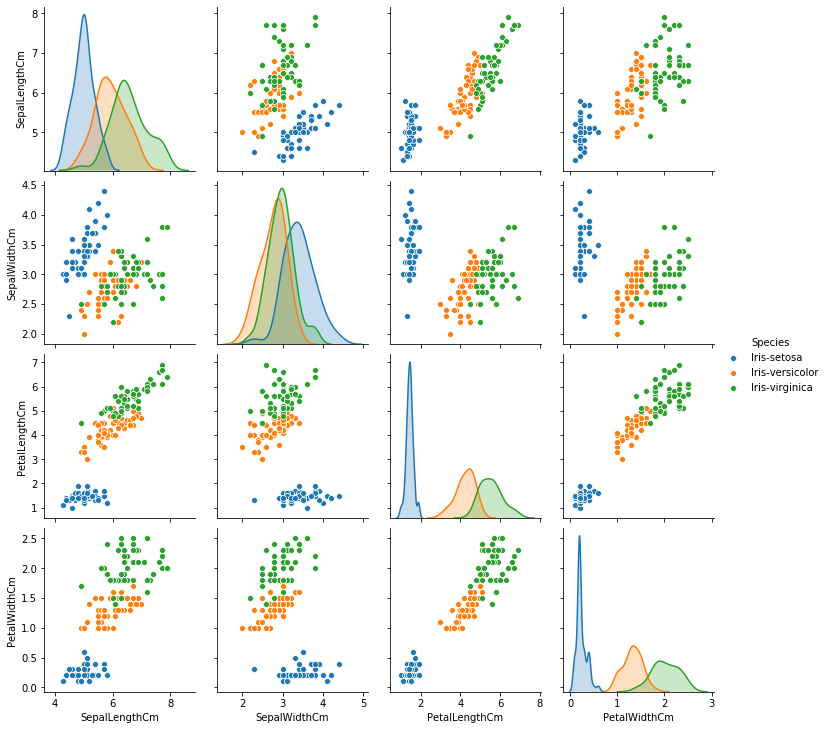

In [8]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [12]:
X_train

array([[0.79594782, 0.55370283, 0.24224499, 0.03460643],
       [0.80779568, 0.53853046, 0.23758697, 0.03167826],
       [0.69594002, 0.30447376, 0.60894751, 0.22835532],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.79778206, 0.5424918 , 0.25529026, 0.06382256],
       [0.82647451, 0.4958847 , 0.26447184, 0.03305898],
       [0.67467072, 0.36998072, 0.58761643, 0.25028107],
       [0.76444238, 0.27125375, 0.55483721, 0.18494574],
       [0.76785726, 0.34902603, 0.51190484, 0.16287881],
       [0.73081412, 0.34743622, 0.56308629, 0.16772783],
       [0.79837025, 0.55735281, 0.22595384, 0.03012718],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.70953708, 0.28008043, 0.61617694, 0.1960563 ],
       [0.86093857, 0.44003527, 0.24871559, 0.0573959 ],
       [0.69193502, 0.32561648, 0.60035539, 0.23403685],
       [0.69198788, 0.34599394, 0.58626751, 0.24027357],
       [0.70610474, 0.3258945 , 0.59747324, 0.1955367 ],
       [0.71066905, 0.35533453,

In [9]:
param_grid = {'neuron_numb': [i for i in range(2, 11, 2)],
              'epochs_n': [i for i in range(3000, 10000, 1000)]}

In [20]:
### Шаг 3. Обученние нейронной сети
random.seed(42)

results = {
    'neuron_numb': [],
    'epochs_n': [],
    'accuracy': []
}


# определим число нейронов скрытого слоя
for param in itertools.product(*param_grid.values()):
    neuron_numb = param[0]
    epochs_n = param[1]
    results['epochs_n'].append(epochs_n)
    results['neuron_numb'].append(neuron_numb)
    print(f"""{datetime.now()} learning at neuron_numb={neuron_numb} & epochs_n={epochs_n}""")

    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = 0.1
    
    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(epochs_n):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))  
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        
        
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
#     plt.figure(figsize = (16,5))
#     plt.plot(errors)
#     plt.xlabel('Обучение')
#     plt.ylabel('Ошибка')
#     plt.show() # расскоментируйте, чтобы посмотреть 

#     N = 50
#     plt.figure(figsize = (16,5))
#     plt.plot(layer2[:N,1], 'r',label = 'Y new')
#     plt.plot(y_train[:N,1],'g', label = 'Y train')
#     plt.xlabel('№ примера')
#     plt.ylabel('выход сети и целевой')
#     plt.legend()
#     plt.show() # расскоментируйте, чтобы посмотреть 

#     print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
    results['accuracy'].append(accuracy)

df_results = pd.DataFrame(results).sort_values('accuracy', axis=0, ascending=False).reset_index(drop=True)
df_results

2021-06-27 15:50:43.032670 learning at neuron_numb=2 & epochs_n=3000
2021-06-27 15:50:43.273965 learning at neuron_numb=2 & epochs_n=4000
2021-06-27 15:50:43.596578 learning at neuron_numb=2 & epochs_n=5000
2021-06-27 15:50:43.968932 learning at neuron_numb=2 & epochs_n=6000
2021-06-27 15:50:44.397212 learning at neuron_numb=2 & epochs_n=7000
2021-06-27 15:50:44.967014 learning at neuron_numb=2 & epochs_n=8000
2021-06-27 15:50:45.628038 learning at neuron_numb=2 & epochs_n=9000
2021-06-27 15:50:46.326758 learning at neuron_numb=4 & epochs_n=3000
2021-06-27 15:50:46.563076 learning at neuron_numb=4 & epochs_n=4000
2021-06-27 15:50:46.908098 learning at neuron_numb=4 & epochs_n=5000
2021-06-27 15:50:47.300433 learning at neuron_numb=4 & epochs_n=6000
2021-06-27 15:50:47.760224 learning at neuron_numb=4 & epochs_n=7000
2021-06-27 15:50:48.280274 learning at neuron_numb=4 & epochs_n=8000
2021-06-27 15:50:48.882495 learning at neuron_numb=4 & epochs_n=9000
2021-06-27 15:50:49.665682 learnin

,neuron_numb,epochs_n,accuracy
0,6,9000,97.890408
1,10,9000,97.881369
2,8,9000,97.868575
3,8,8000,97.838413
4,6,8000,97.806503
5,4,9000,97.798080
6,10,8000,97.763866
7,10,7000,97.718037
8,6,7000,97.699323
9,4,8000,97.692809


Выводы: По результатам обучения видим, что чем больше эпох, тем выше точность сети. Большое количество нейронов, как и совсем маленькое, дают результат немного хуже. В нашем случае оптимальные параметры сети - 6 нейронов и 9000 эпох.